# Linear Regression Assignment - Group Project R & D

In [1]:
# Step 1: Import the required python packages

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


In [3]:

# Step 2 - Import data

# Create the dataset from the provided data
data = {
    'YearsExperience': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 
                        3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0, 
                        6.8, 7.1, 7.9, 8.2, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5],
    'Salary': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189,
               63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940,
               91738, 98273, 101302, 113812, 109431, 105582, 116969, 112635, 122391, 121872]
}

In [4]:
# Create DataFrame
df = pd.DataFrame(data)

print("✓ Data loaded successfully")
print(f"Dataset shape: {df.shape}")

✓ Data loaded successfully
Dataset shape: (30, 2)


In [5]:

# Step 3 - Look at data

print("First 5 rows:")
print("=" * 50)
display(df.head())

First 5 rows:


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
print("\n" + "=" * 50)
print("Last 5 rows:")
print("=" * 50)
display(df.tail())


Last 5 rows:


,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:

# Step 4 - Analyze data

print("Dataset Information:")
print("=" * 60)
print(df.info())

print("\n" + "=" * 60)
print("Statistical Summary:")
print("=" * 60)
display(df.describe())

print("\n" + "=" * 60)
print("Missing Values:")
print("=" * 60)
print(df.isnull().sum())

print("\n" + "=" * 60)
print(f"Data Types:\n{df.dtypes}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes
None

Statistical Summary:


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000



Missing Values:
YearsExperience    0
Salary             0
dtype: int64

Data Types:
YearsExperience    float64
Salary               int64
dtype: object


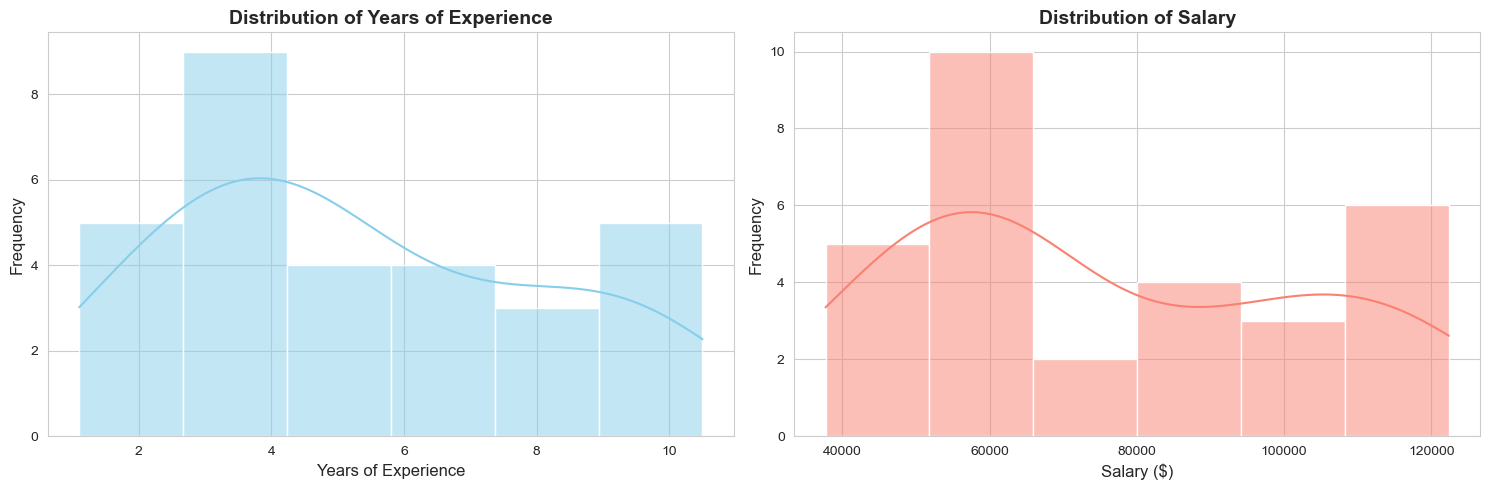


Distribution Analysis:
Experience Range: 1.1 - 10.5 years
Salary Range: $37,731 - $122,391


In [8]:

# Step 5 - Check Distribution of data

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of Years of Experience
sns.histplot(df['YearsExperience'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Years of Experience', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Years of Experience', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Distribution of Salary
sns.histplot(df['Salary'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Salary', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Salary ($)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

print("\nDistribution Analysis:")
print("=" * 60)
print(f"Experience Range: {df['YearsExperience'].min():.1f} - {df['YearsExperience'].max():.1f} years")
print(f"Salary Range: ${df['Salary'].min():,.0f} - ${df['Salary'].max():,.0f}")

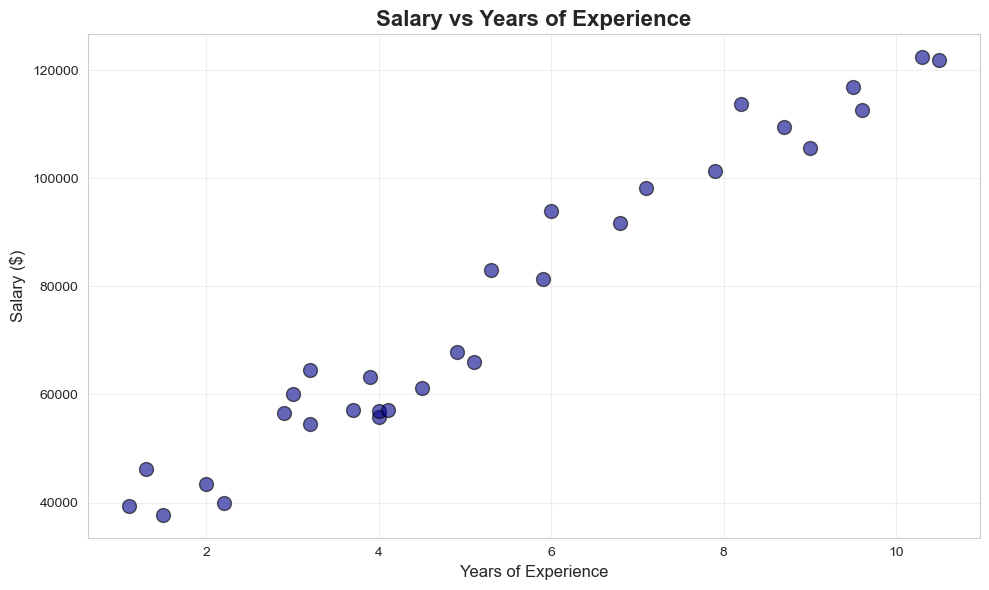


Correlation Analysis:
Correlation coefficient: 0.9782
✓ Strong positive correlation - As experience increases, salary increases significantly


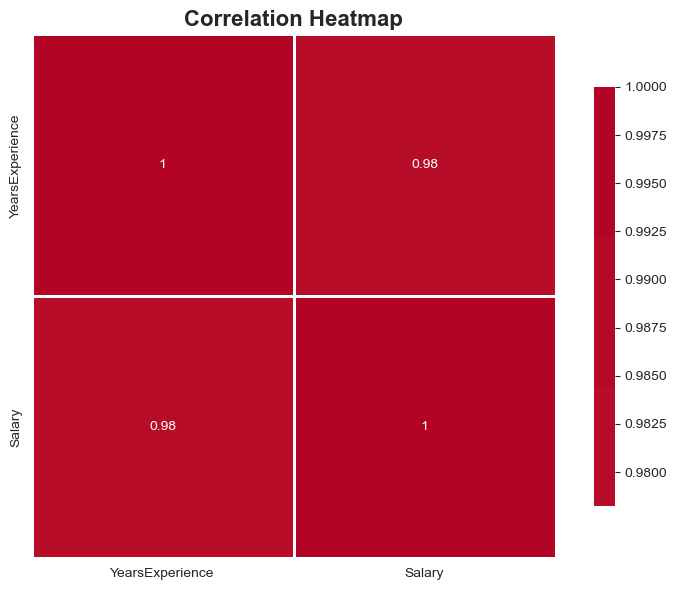

In [9]:

# Step 5.1 - Relationship between Salary and Experience

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['YearsExperience'], df['Salary'], color='darkblue', 
            s=100, alpha=0.6, edgecolors='black')
plt.title('Salary vs Years of Experience', fontsize=16, fontweight='bold')
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['YearsExperience'].corr(df['Salary'])
print("\nCorrelation Analysis:")
print("=" * 60)
print(f"Correlation coefficient: {correlation:.4f}")
if correlation > 0.8:
    print("✓ Strong positive correlation - As experience increases, salary increases significantly")
elif correlation > 0.5:
    print("✓ Moderate positive correlation")
else:
    print("⚠ Weak correlation")

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [10]:

# Step 6 - Split into Independent/Dependent variables

# Independent variable (Features)
X = df[['YearsExperience']]  # Note: Double brackets to keep it as DataFrame

# Dependent variable (Target)
y = df['Salary']

print("Data Split:")
print("=" * 60)
print(f"Independent Variable (X) - YearsExperience:")
print(f"  Shape: {X.shape}")
print(f"  Type: {type(X)}")
print(f"\nDependent Variable (y) - Salary:")
print(f"  Shape: {y.shape}")
print(f"  Type: {type(y)}")

Data Split:
Independent Variable (X) - YearsExperience:
  Shape: (30, 1)
  Type: <class 'pandas.core.frame.DataFrame'>

Dependent Variable (y) - Salary:
  Shape: (30,)
  Type: <class 'pandas.core.series.Series'>


In [11]:

# Step 7 - Split into Train/Test sets

# Split data into training and testing sets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print("Train-Test Split:")
print("=" * 60)
print(f"Training set size: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing set size: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nTraining set range:")
print(f"  Experience: {X_train['YearsExperience'].min():.1f} - {X_train['YearsExperience'].max():.1f} years")
print(f"  Salary: ${y_train.min():,.0f} - ${y_train.max():,.0f}")
print(f"\nTesting set range:")
print(f"  Experience: {X_test['YearsExperience'].min():.1f} - {X_test['YearsExperience'].max():.1f} years")
print(f"  Salary: ${y_test.min():,.0f} - ${y_test.max():,.0f}")

Train-Test Split:
Training set size: 24 samples (80.0%)
Testing set size: 6 samples (20.0%)

Training set range:
  Experience: 1.1 - 10.5 years
  Salary: $37,731 - $122,391

Testing set range:
  Experience: 3.2 - 9.6 years
  Salary: $57,189 - $113,812


In [12]:

# Step 8 - Train model

# Create Linear Regression model
regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

print("Model Training Complete!")
print("=" * 60)
print("✓ Linear Regression model trained successfully")
print(f"✓ Training samples used: {len(X_train)}")

Model Training Complete!
✓ Linear Regression model trained successfully
✓ Training samples used: 24


In [13]:

# Step 9 - Predict results

# Make predictions on test set
y_pred = regressor.predict(X_test)

# Create comparison DataFrame
results_df = pd.DataFrame({
    'Experience (years)': X_test['YearsExperience'].values,
    'Actual Salary': y_test.values,
    'Predicted Salary': y_pred,
    'Difference': y_test.values - y_pred,
    'Error %': np.abs((y_test.values - y_pred) / y_test.values * 100)
})

results_df = results_df.sort_values('Experience (years)').reset_index(drop=True)

print("Prediction Results:")
print("=" * 80)
print(results_df.to_string(index=False))
print("\n" + "=" * 80)
print(f"Average Error: {results_df['Error %'].mean():.2f}%")

Prediction Results:
 Experience (years)  Actual Salary  Predicted Salary   Difference   Error %
                3.2          64445      55477.792045  8967.207955 13.914513
                3.7          57189      60189.699707 -3000.699707  5.246988
                4.9          67938      71498.278095 -3560.278095  5.240481
                5.3          83088      75267.804224  7820.195776  9.411944
                8.2         113812     102596.868661 11215.131339  9.854085
                9.6         112635     115790.210113 -3155.210113  2.801270

Average Error: 7.74%


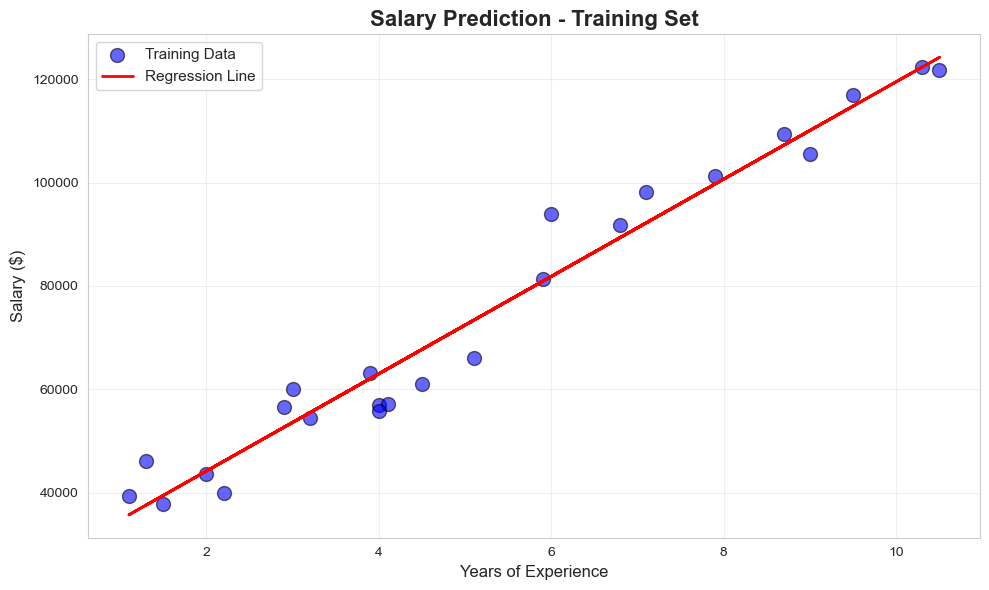

Training Set Visualization Complete
The red line shows the model's learned relationship between experience and salary


In [14]:

# Step 10 - Prediction on training set

plt.figure(figsize=(10, 6))

# Scatter plot of training data
plt.scatter(X_train, y_train, color='blue', s=100, alpha=0.6, 
           label='Training Data', edgecolors='black')

# Regression line
plt.plot(X_train, regressor.predict(X_train), color='red', 
        linewidth=2, label='Regression Line')

plt.title('Salary Prediction - Training Set', fontsize=16, fontweight='bold')
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary ($)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Training Set Visualization Complete")
print("The red line shows the model's learned relationship between experience and salary")

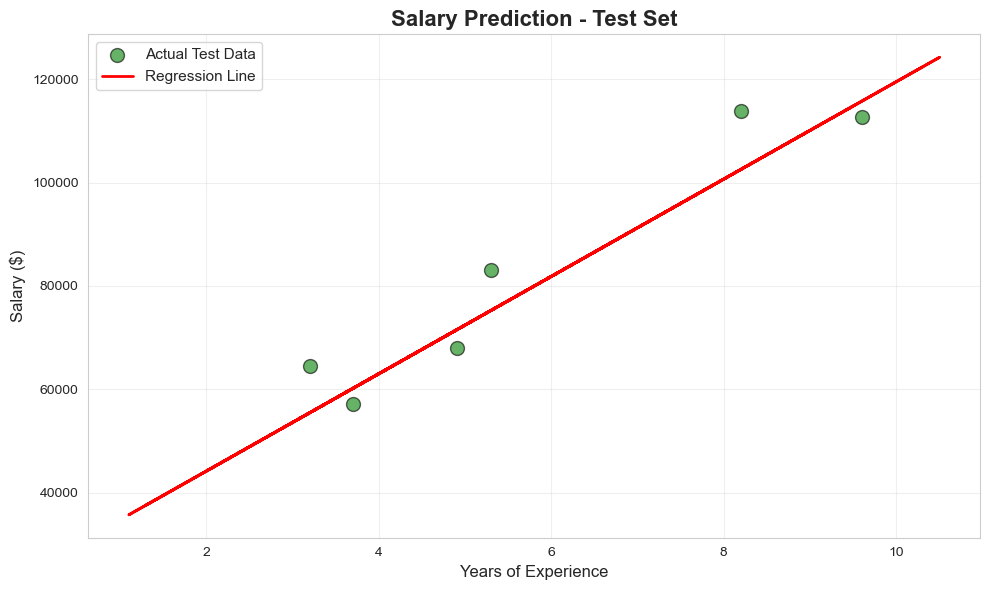

Test Set Visualization Complete


In [15]:

# Step 10.1 - Prediction on test set

plt.figure(figsize=(10, 6))

# Scatter plot of test data
plt.scatter(X_test, y_test, color='green', s=100, alpha=0.6, 
           label='Actual Test Data', edgecolors='black')

# Regression line
plt.plot(X_train, regressor.predict(X_train), color='red', 
        linewidth=2, label='Regression Line')

plt.title('Salary Prediction - Test Set', fontsize=16, fontweight='bold')
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary ($)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Test Set Visualization Complete")

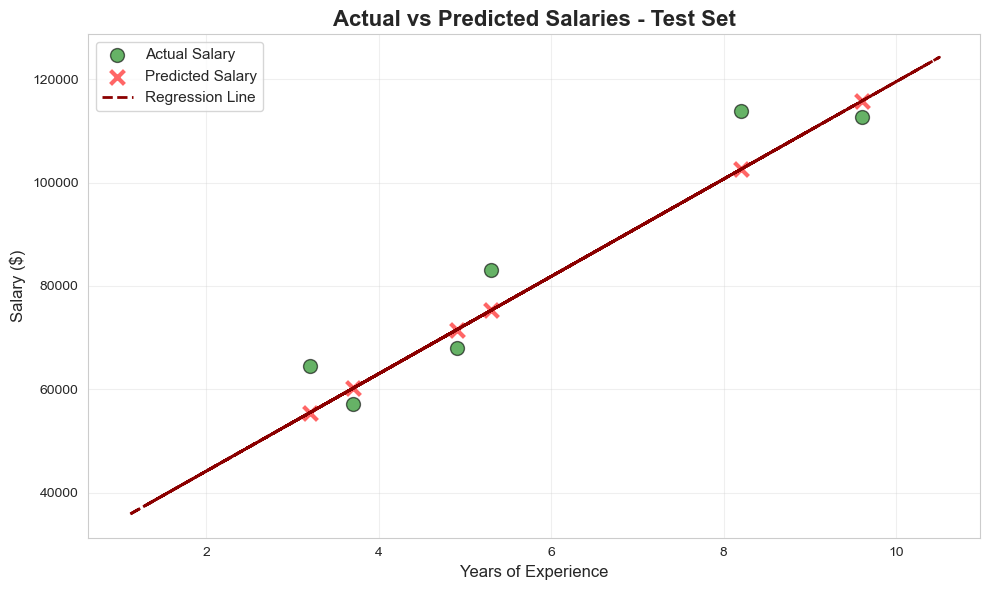

In [16]:

# Additional visualization - Actual vs Predicted

plt.figure(figsize=(10, 6))

# Scatter plot comparing actual vs predicted
plt.scatter(X_test, y_test, color='green', s=100, alpha=0.6, 
           label='Actual Salary', edgecolors='black')
plt.scatter(X_test, y_pred, color='red', s=100, alpha=0.6, 
           label='Predicted Salary', marker='x', linewidths=3)

# Regression line
plt.plot(X_train, regressor.predict(X_train), color='darkred', 
        linewidth=2, linestyle='--', label='Regression Line')

plt.title('Actual vs Predicted Salaries - Test Set', fontsize=16, fontweight='bold')
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary ($)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
# Step 11 - Coefficient and Intercept

# Get model parameters
coefficient = regressor.coef_[0]
intercept = regressor.intercept_

print("Linear Regression Equation:")
print("=" * 60)
print(f"Salary = {intercept:.2f} + {coefficient:.2f} × YearsExperience")
print("\n" + "=" * 60)
print("Model Parameters:")
print(f"  Coefficient (Slope): ${coefficient:,.2f}")
print(f"  Intercept: ${intercept:,.2f}")
print("\n" + "=" * 60)
print("Interpretation:")
print(f"  • Base salary (0 years experience): ${intercept:,.2f}")
print(f"  • Salary increase per year of experience: ${coefficient:,.2f}")

Linear Regression Equation:
Salary = 25321.58 + 9423.82 × YearsExperience

Model Parameters:
  Coefficient (Slope): $9,423.82
  Intercept: $25,321.58

Interpretation:
  • Base salary (0 years experience): $25,321.58
  • Salary increase per year of experience: $9,423.82


In [18]:

# Additional Step - Model Performance Evaluation

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print("=" * 60)
print(f"Mean Squared Error (MSE):        ${mse:,.2f}")
print(f"Root Mean Squared Error (RMSE):  ${rmse:,.2f}")
print(f"Mean Absolute Error (MAE):       ${mae:,.2f}")
print(f"R² Score:                        {r2:.4f} ({r2*100:.2f}%)")

print("\n" + "=" * 60)
print("Performance Interpretation:")
if r2 >= 0.95:
    print("✓ Excellent! The model explains over 95% of variance")
elif r2 >= 0.85:
    print("✓ Very Good! The model performs well")
elif r2 >= 0.70:
    print("✓ Good! The model has acceptable performance")
else:
    print("⚠ Fair. The model could be improved")

print(f"\nAverage prediction error: ±${mae:,.2f}")

Model Performance Metrics:
Mean Squared Error (MSE):        $49,830,096.86
Root Mean Squared Error (RMSE):  $7,059.04
Mean Absolute Error (MAE):       $6,286.45
R² Score:                        0.9024 (90.24%)

Performance Interpretation:
✓ Very Good! The model performs well

Average prediction error: ±$6,286.45


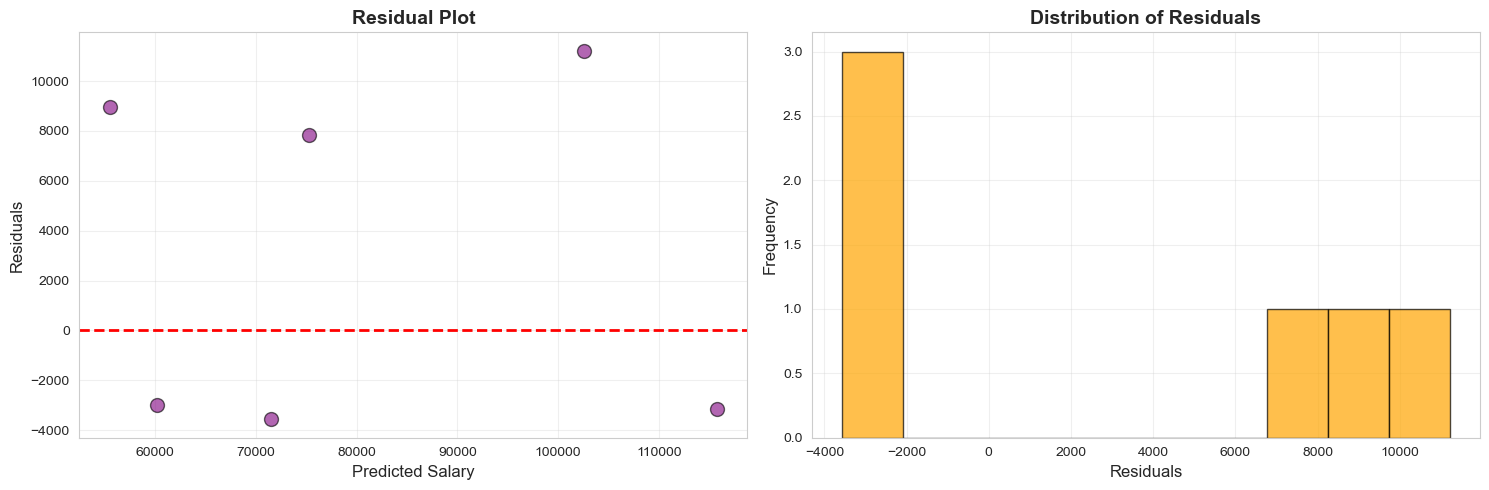

Residual Analysis:
Mean of residuals: $3,047.72
Std of residuals: $6,974.94


In [19]:

# Additional Step - Residual Analysis

residuals = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Residual plot
axes[0].scatter(y_pred, residuals, color='purple', alpha=0.6, s=100, edgecolors='black')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Salary', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)
axes[0].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Residual distribution
axes[1].hist(residuals, bins=10, color='orange', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Residuals', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Residuals', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Residual Analysis:")
print("=" * 60)
print(f"Mean of residuals: ${residuals.mean():,.2f}")
print(f"Std of residuals: ${residuals.std():,.2f}")

In [20]:
# Cell 18: Make predictions for new data

# Additional Step - Predict salary for new experience levels

new_experiences = np.array([[2.5], [5.0], [7.5], [11.0]])
new_predictions = regressor.predict(new_experiences)

print("Salary Predictions for New Experience Levels:")
print("=" * 60)
for exp, salary in zip(new_experiences.flatten(), new_predictions):
    print(f"{exp:.1f} years experience  →  Predicted Salary: ${salary:,.2f}")

Salary Predictions for New Experience Levels:
2.5 years experience  →  Predicted Salary: $48,881.12
5.0 years experience  →  Predicted Salary: $72,440.66
7.5 years experience  →  Predicted Salary: $96,000.20
11.0 years experience  →  Predicted Salary: $128,983.55


C:\Users\daniella.salima\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
# Final Summary

print("=" * 70)
print(" " * 15 + "SALARY PREDICTION MODEL SUMMARY")
print("=" * 70)

print("\n📊 Dataset Information:")
print(f"   • Total samples: {len(df)}")
print(f"   • Features: YearsExperience")
print(f"   • Target: Salary")
print(f"   • Experience range: {df['YearsExperience'].min():.1f} - {df['YearsExperience'].max():.1f} years")
print(f"   • Salary range: ${df['Salary'].min():,.0f} - ${df['Salary'].max():,.0f}")

print("\n📈 Model Performance:")
print(f"   • Algorithm: Linear Regression")
print(f"   • R² Score: {r2:.4f} ({r2*100:.2f}%)")
print(f"   • RMSE: ${rmse:,.2f}")
print(f"   • MAE: ${mae:,.2f}")
print(f"   • Correlation: {correlation:.4f}")

print("\n💼 Salary Estimation Formula:")
print(f"   Salary = ${intercept:,.2f} + ${coefficient:,.2f} × YearsExperience")

print("\n🎯 Key Insights:")
print(f"   • Starting salary (0 years): ${intercept:,.2f}")
print(f"   • Annual salary increase: ${coefficient:,.2f} per year")
print(f"   • Average prediction error: ±${mae:,.2f}")

print("\n" + "=" * 70)
print("✓ Analysis Complete! Model ready for predictions.")
print("=" * 70)

               SALARY PREDICTION MODEL SUMMARY

📊 Dataset Information:
   • Total samples: 30
   • Features: YearsExperience
   • Target: Salary
   • Experience range: 1.1 - 10.5 years
   • Salary range: $37,731 - $122,391

📈 Model Performance:
   • Algorithm: Linear Regression
   • R² Score: 0.9024 (90.24%)
   • RMSE: $7,059.04
   • MAE: $6,286.45
   • Correlation: 0.9782

💼 Salary Estimation Formula:
   Salary = $25,321.58 + $9,423.82 × YearsExperience

🎯 Key Insights:
   • Starting salary (0 years): $25,321.58
   • Annual salary increase: $9,423.82 per year
   • Average prediction error: ±$6,286.45

✓ Analysis Complete! Model ready for predictions.
